# Conclusion / Findings

The main point of an analysis is to ask the appropriate questions. Here are the following questions that has been provided by me after brainstorming through the dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import dataset
df_mean = pd.read_csv('data/data_mean.csv', index_col=False)

### Q1. Does increase in the size leads to critical situation ( malign diagnosis ) ?

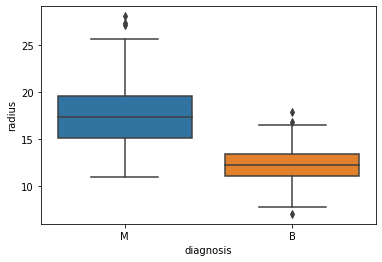

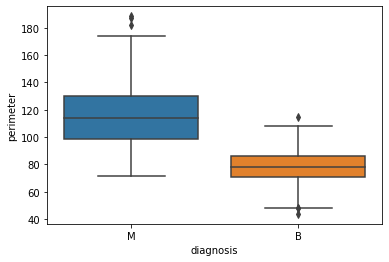

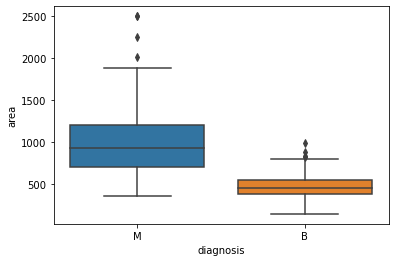

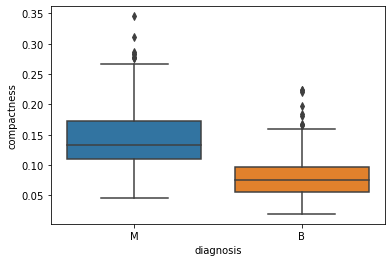

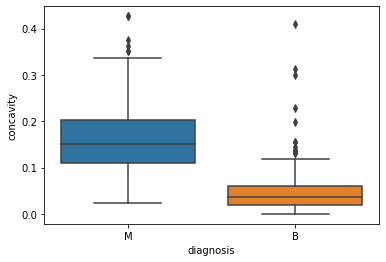

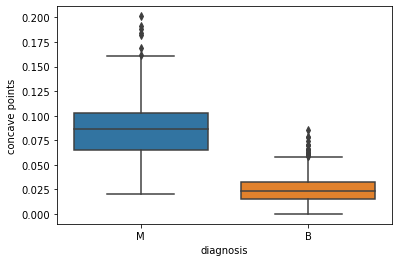

In [3]:
# Box plots
for col in df_mean.columns:
    if col == "radius" or col == "perimeter" or col == "area" or col == "compactness" or col == "concavity" or col == "concave points":
        plt.figure()
        sns.boxplot(x="diagnosis", y=col, data=df_mean)
    else:
        pass

### Answer : 
>We go through the mean values for both Malign and Benign cases and see a pattern that the values are always higher for malign diagnosis which can be verified through the box plots, blue ones are malign and orange are benign. 

### Q2. What factors are important in pridicting the diagnosis of the case to be malign ?

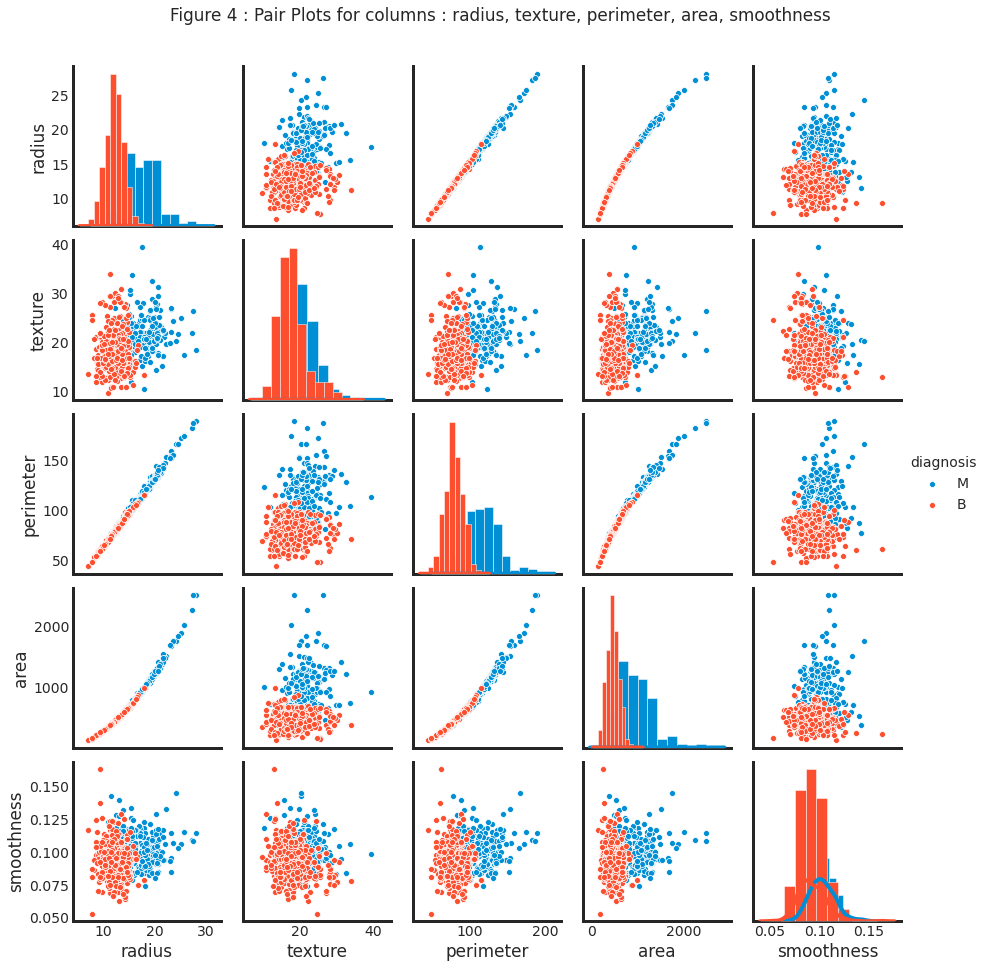

In [4]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.pairplot(df_mean[[df_mean.columns[0],df_mean.columns[1],df_mean.columns[2],df_mean.columns[3],
                      df_mean.columns[4],df_mean.columns[5]]],hue="diagnosis")
g = g.map_diag(plt.hist)
g = g.fig.suptitle("Figure 4 : Pair Plots for columns : radius, texture, perimeter, area, smoothness", y=1.06)

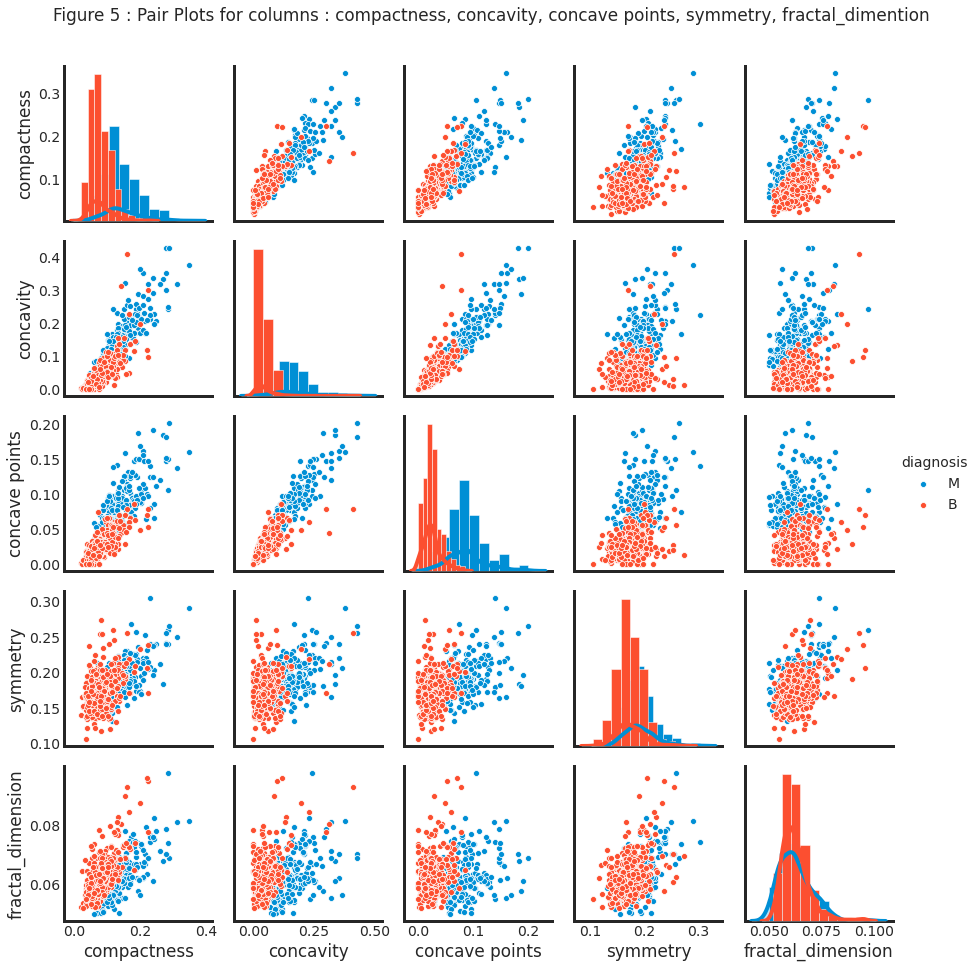

In [7]:
# remaining columns
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.pairplot(df_mean[[df_mean.columns[0],df_mean.columns[6],df_mean.columns[7],df_mean.columns[8],
                      df_mean.columns[9],df_mean.columns[10]]],hue="diagnosis");
g = g.map_diag(plt.hist)
g = g.fig.suptitle("Figure 5 : Pair Plots for columns : compactness, concavity, concave points, symmetry, fractal_dimention", y=1.06)

### Answer : 
>From the above figures we can observe from the scatterplots that  __radius, perimeter, area, compactness, concavity and concavity points__ are the variables which are highly related to malignacy as we can inspect the graphs and see that they have linear correlation.

### Q3. Are there any threshold values above which a case could be concidered critical ?

In [8]:
# check mean values for malign cases ***** CANCER PATIENTS *****
df_mean[df_mean['diagnosis']=='M'].describe(percentiles=[.05,.1,.25,.50,.75,.8,.9,.95])

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960
5%,12.803000,16.055500,84.679500,504.905000,0.084016,0.066981,0.053345,0.033912,0.154865,0.053012
10%,13.610000,17.252000,88.424000,573.130000,0.087803,0.084284,0.080349,0.051947,0.159040,0.054196
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075
80%,20.154000,24.438000,132.480000,1249.400000,0.113860,0.186420,0.213460,0.110180,0.213060,0.068770


In [9]:
# check mean values for benign cases  ***** NORMAL CASE *****
df_mean[df_mean['diagnosis']=='B'].describe(percentiles=[.05,.1,.25,.50,.75,.8,.9,.95])

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
5%,9.039400,12.838000,58.966000,248.220000,0.073542,0.037724,0.001534,0.003234,0.137980,0.055018
10%,9.726600,13.308000,61.584000,288.860000,0.077122,0.042916,0.007406,0.006983,0.145400,0.055958
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760
80%,13.648000,20.668000,87.872000,572.200000,0.103260,0.106800,0.067348,0.037088,0.193320,0.066754


### Answer :
>From the above results we can see that the mean values for both malign and benign cases are provided. Malign cases are concidered critical or severe whereas benign are normal cases. Since we have concidered the factors __radius, perimeter, area, compactness, concavity and concavity points__ of utmost importance, we'll be analyzing those. For the size of radius we can observe that for normal case that 95% of the cases are under 14 (approx) but we can also see that 10% of the malign cases are below 14 (approx), therefor no assusmption could be made directly based on single number. Similarly for each factor this issue arrises there for we need a prediction model to analyse the dataset with interrelation.